In [27]:
import pandas as pd
from fbprophet import Prophet

# 加载销售额，csv
df = pd.read_csv('train.csv')
df.drop(['ID'],axis=1,inplace=True)

df.rename(columns={'Count':'y'},inplace=True)
# 日期格式转换
df.time = pd.to_datetime(df.Datetime,format = '%d-%m-%Y %H:%M')
df.index = df.time

# 按天粒度重采样
df_day = df.resample('D').sum()
# df_month.time = df.index

# 重新设置ds 
df_day['ds'] = df_day.index
df_day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29
...,...,...
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23


In [37]:

# df_month
model = Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)

model.fit(df_day)
# 生成需要预测的数据长度
future = model.make_future_dataframe(periods = 7*30)

future




INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
967,2015-04-19
968,2015-04-20
969,2015-04-21
970,2015-04-22


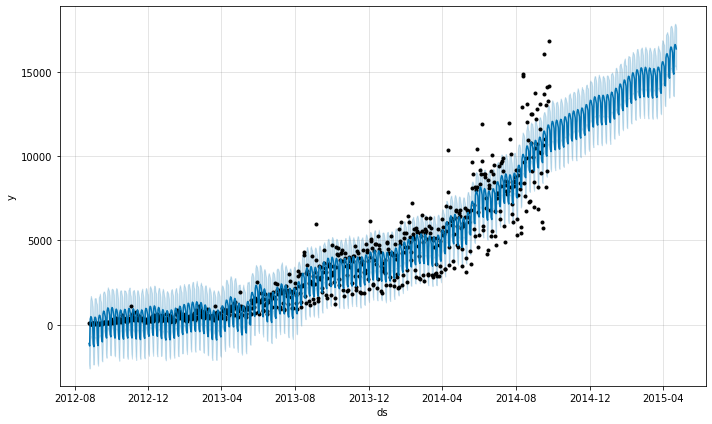

In [38]:
import matplotlib.pyplot as plt

# 预测并画出预测趋势图
forecast = model.predict(future)
model.plot(forecast)
plt.show()


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


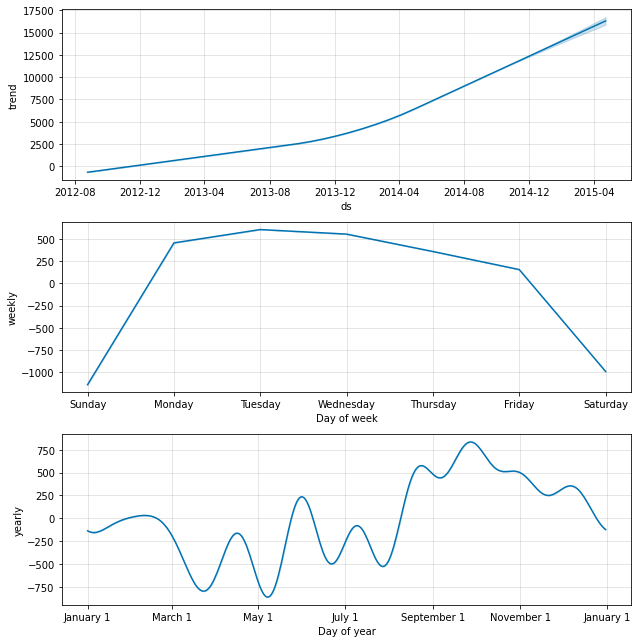

In [39]:
# 分解成 趋势 weekly yearly 趋势图

model.plot_components(forecast)
print(forecast.columns)